In [7]:
# Libraries
# #########
import os
import re
import sys
import shutil

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, pi, e, m_e, epsilon_0

# Below functions imported for density plots
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from pathlib import Path

path_h5files = '/home/novac/Desktop/my_projects/qv3d-automation/data/lag3.9/density-1e16/h5files'


In [8]:
def get_mframeParameters(filepath, kp):
    try:
        file=h5py.File(filepath,'r')
        #print("file = %s \n" % os.path.basename(filepath))
    except IOError:
        sys.stderr.write("File does not exist:\n  %s\n" % filepath)
        sys.exit(-1)
    
    phase = file['phase'][0]
    X = np.array(file.get('X'))
    Y = np.array(file.get('Y'))
    ex = np.array(file.get('ex'))
    n0 = np.array(file.get('n0'))
    n1 = np.array(file.get('n1'))
    n2 = np.array(file.get('n2'))
    ydim = Y.shape
    onaxisY2 = int(ydim[0]/2)
    ex_onaxis = ex[onaxisY2,:]
    distance = phase/kp     # [m]
    #print(lamdap, phase)
    return n0, n1, n2, ex, ex_onaxis, X, Y, distance

NameError: name 'Xmin' is not defined

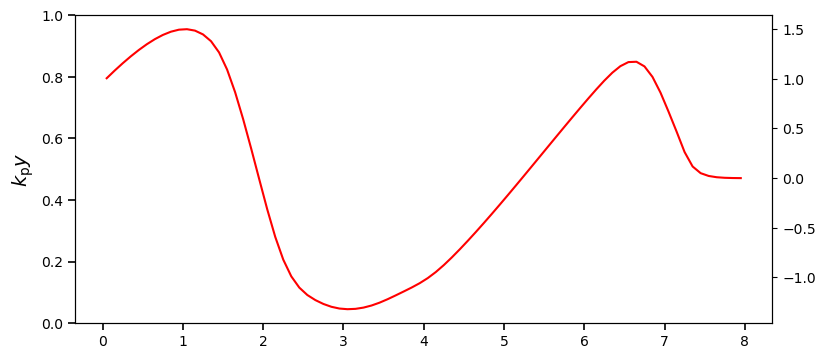

In [12]:
minWakefield_scan_0cm = []
minWakefield_scan_5cm = []
minWakefield_scan_10cm = []
minWakefield_scan_15cm = []
minWakefield_scan_20cm = []
minWakefield_scan_25cm = []


    
#################################################
# Split by '-' and take the last part of 'density-7e14'
density_str = path_h5files.split('density-')[1].split('/')[0]
density = float(density_str)

print("{:.2e}".format(density), end="\r")  # Output: 7e14

density*=1e6 #/m3
wp = np.sqrt(density*e**2/epsilon_0/m_e)
kp=wp/c
lamdap = 2*pi/kp
E_WB = c*m_e*wp/e # wavebreaking field
E_WB/=1e9 #GeV
####################################################

# ##################
# Analyze wakefields
# ##################
    
# Specify the folder path
folder_path = Path(path_h5files)

# Use Path.glob() to list files matching the pattern
files = list(folder_path.glob('v2d_mframe_*.h5'))

# Sort the filenames based on the numeric part extracted from each filename
sorted_file = sorted(files)

# Print sorted files
#for file in sorted_file_names:
#   print(file)


del sorted_file[0]
#del sorted_file[4]

# Plot 
# ####

# Set font size and create a figure with specified size
fontsize = 14
fig, ax = plt.subplots(figsize=(9, 4))

# Set spacing between subplots (uncomment if necessary)
# fig.tight_layout(pad=3.0)

# Customize tick parameters
ax.tick_params(which='both', width=1.2)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

# Set y-axis label
ax.set_ylabel(r'$k_\mathrm{p}y$', fontsize=fontsize)

# Define colors for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Create a filled contour plot
#ax.contourf(X, Y, n1, levels=20, alpha=1, cmap='Reds')  # Photon number ~ beta oscillations * number of electrons


######################################################
# Create twin axis for secondary y-axis
ax2 = ax.twinx()  

# Iterate over sorted files to plot on ax2
for i, filepath in enumerate(sorted_file):
    n0, n1, n2, ex, ex_onaxis, X, Y, distance = get_mframeParameters(filepath, kp)

    abs_min_wakefield = abs( min(ex_onaxis) ) * E_WB
    if i == 0:
        minWakefield_scan_0cm.append(abs_min_wakefield)
        ax2.plot(X, ex_onaxis * E_WB, c=colors[i % len(colors)], label=str(int(round(distance*100))) + ' cm')  # Avoid IndexError
    elif i == 1:
        minWakefield_scan_5cm.append(abs_min_wakefield)
    elif i == 2:
        minWakefield_scan_10cm.append(abs_min_wakefield)
    elif i == 3:
        minWakefield_scan_15cm.append(abs_min_wakefield)
    elif i == 4:
        minWakefield_scan_20cm.append(abs_min_wakefield)
    elif i == 5:
        minWakefield_scan_25cm.append(abs_min_wakefield)
            
    # Plotting on the second axis
    #ax2.plot(X, ex_onaxis * E_WB, c=colors[i % len(colors)], label=str(int(round(distance*100))) + ' cm')  # Avoid IndexError
        

#ax.contourf(X,Y,n1, levels=20, alpha=1, cmap='Reds') # photon number ~ beta oscillations * number of electrons
#n1 = n0
# Calculate plot limits
#Xmin = X[0] #+ 0.5 * (X[0] - X[1])
#Xmax = X[-1] #+ 0.5 * (X[-1] - X[-2])
#Ymin = Y[0] #+ 0.5 * (Y[0] - Y[1])
#Ymax = Y[-1] #+ 0.5 * (Y[-1] - Y[-2])

cmaps = ["Greens", "Oranges", "BuPu"]  # Set colormaps for each field
titles = [r"$n_\mathrm{p}/n_{0}$", r"$n_\mathrm{d}/n_{0}$", r"$n_{be}/n_{0}$"]

data = n0
#########
# Normalize the data
norm = Normalize(vmin=0, vmax=np.max(data))

# Create a custom colormap and RGBA data
cmap = plt.get_cmap(cmaps[0])
rgba_data = cmap(norm(data))

# Create a mask for low values (set alpha to 0 for transparency)
low_value_mask = data < 0.1 * np.max(data)
rgba_data[low_value_mask, 3] = 1

# Plot the data using the RGBA array
img_n0 = ax.imshow(rgba_data, extent=(Xmin, Xmax, Ymin, Ymax), aspect='auto', interpolation='spline36')
ax.add_image(img_n0)

#ax.contourf(X,Y,data, levels=20, alpha=1, cmap=cmaps[0]) # photon number ~ beta oscillations * number of electrons
# Add a color bar for the current field
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmaps[0]), ax=ax, fraction=0.046, pad=0.1)
cbar.set_label(titles[0])

data = n1
#########
# Normalize the data
norm = Normalize(vmin=0, vmax=np.max(data))
    
# Create a custom colormap and RGBA data
cmap = plt.get_cmap(cmaps[1])
rgba_data = cmap(norm(data))
    
# Create a mask for low values (set alpha to 0 for transparency)
low_value_mask = data < 0.1 * np.max(data)
rgba_data[low_value_mask, 3] = 0
    
# Plot the data using the RGBA array
img_n1 = ax.imshow(rgba_data, extent=(Xmin, Xmax, Ymin, Ymax), aspect='auto', interpolation='lanczos', vmin = data.min(), vmax = data.max()) # interpolation='nearest' 'nearest': Nearest-neighbor interpolation (blocky appearance).
ax.add_image(img_n1)
    
#'bilinear': Linear interpolation (smoother).
#'bicubic': Cubic spline interpolation (even smoother).
#'lanczos': High-quality interpolation.
#ax.contourf(X,Y,data, levels=100, alpha=.2, cmap=cmaps[1]) # photon number ~ beta oscillations * number of electrons
# Add a color bar for the current field
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmaps[1]), ax=ax, fraction=0.025, pad=0.12)
cbar.set_label(titles[1])

data = n2
#########
# Normalize the data
norm = Normalize(vmin=0, vmax=np.max(data))

# Create a custom colormap and RGBA data
cmap = plt.get_cmap(cmaps[2])
rgba_data = cmap(norm(data))

# Create a mask for low values (set alpha to 0 for transparency)
low_value_mask = data < 0.2 * np.max(data)
rgba_data[low_value_mask, 3] = 0.

# Plot the data using the RGBA array
img_n1 = ax.imshow(rgba_data, extent=(Xmin, Xmax, Ymin, Ymax), aspect='auto', interpolation='lanczos', vmin = data.min(), vmax = data.max()) # interpolation='nearest' 'nearest': Nearest-neighbor interpolation (blocky appearance).
ax.add_image(img_n1)

#'bilinear': Linear interpolation (smoother).
#'bicubic': Cubic spline interpolation (even smoother).
#'lanczos': High-quality interpolation.
#ax.contourf(X,Y,data, levels=100, alpha=.2, cmap=cmaps[1]) # photon number ~ beta oscillations * number of electrons
# Add a color bar for the current field
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmaps[2]), ax=ax, fraction=0.046, pad=0.1)
cbar.set_label(titles[2])


# Optional: Add legend
ax2.set_ylabel(r'$\mathrm{E_acc \, [GV/m]}$')
ax2.legend(ncol=2, loc='upper center', title='Density = '+density_str, fontsize=8)

plot_address = save_density_plots_dir +'/' + density_str
    
# Show the plot
plt.savefig(plot_address+'.pdf', dpi=100, bbox_inches='tight')
plt.savefig(plot_address+'.png', dpi=100, bbox_inches='tight')

In [10]:
density

1e+22

In [21]:
parent_directory = '/home/novac/Desktop/my_projects/qv3d-automation/pyScripts'
dens_dotpy = os.path.join(parent_directory, 'plot_densities-singleFile.py')

In [22]:
!python {dens_dotpy} {path_h5files} {'/home/novac/Desktop/my_projects/qv3d-automation'} {0}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
